The goal of this exercise is to apply the K-Nearest Neighbors (KNN) Classifier to predict the loan status of an individual based on their personal and financial characteristics.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('loan_data.csv')

In [112]:
df_raw = df.copy()

In [113]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [114]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [116]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [117]:
df.shape

(45000, 14)

Data Cleaning and Preparation

Missing Value

In [118]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Encoding

In [119]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['person_gender']  = le.fit_transform(df['person_gender'])



In [125]:
Encode_columns = ['person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [126]:
for col1 in Encode_columns:
    df[col1]=le.fit_transform(df[col1])

In [127]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [129]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df['person_income'] = scalar.fit_transform(df[['person_income']]) 

In [130]:
preprossed_columns = ['person_age','person_education','person_emp_exp','person_home_ownership','loan_amnt','loan_intent','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','previous_loan_defaults_on_file',]

In [131]:
for col1 in preprossed_columns:
    #print(col1)
    df[col1] = scalar.fit_transform(df[[col1]])

In [132]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,1.525264,-0.104090,-0.892284,0.904822,4.024953,0.852919,1.683039,4.016394,-0.739109,-1.419814,-1.016040,1
1,-1.118963,0,0.849192,-0.846005,-0.892284,0.210609,-1.359209,-0.882904,0.044782,-0.684829,-0.996863,-2.549975,0.984213,0
2,-0.457264,0,0.849192,-0.844065,-0.397517,-1.177817,-0.646600,0.274312,0.625557,3.443074,-0.739109,0.047412,-1.016040,1
3,-0.788113,0,-0.502953,-0.007039,-0.892284,0.904822,4.024953,0.274312,1.417829,3.443074,-0.996863,0.840507,-1.016040,1
4,-0.622689,1,1.525264,-0.176371,-0.727362,0.904822,4.024953,0.274312,1.095549,4.475050,-0.481354,-0.924130,-1.016040,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  float64
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  float64
 5   person_home_ownership           45000 non-null  float64
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  float64
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

EDA 

In [134]:
df_raw.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [135]:
import seaborn as sns


In [136]:
Univar_columns = ['person_gender','person_education','person_home_ownership','loan_intent']

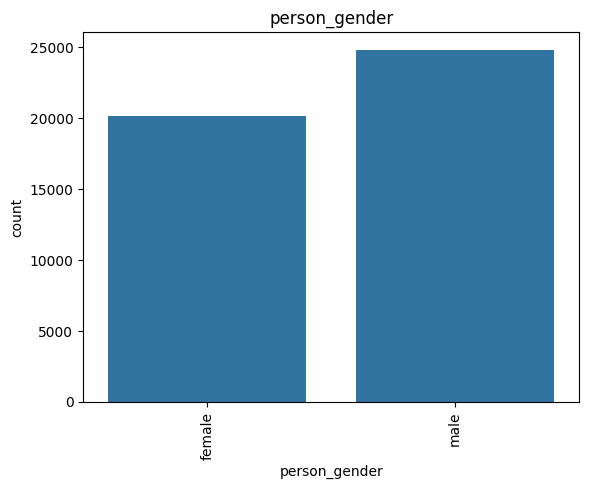

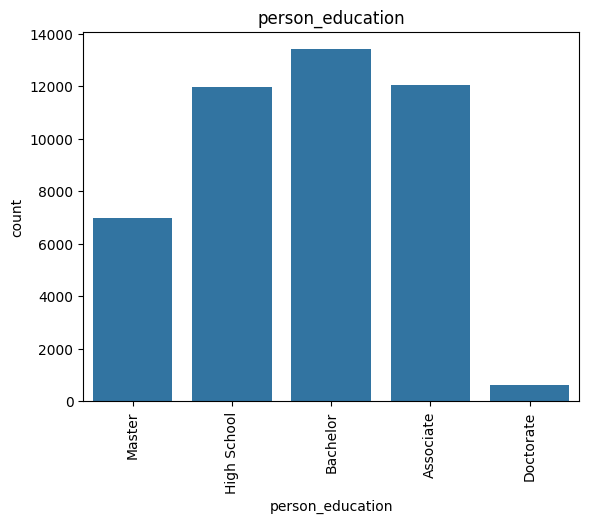

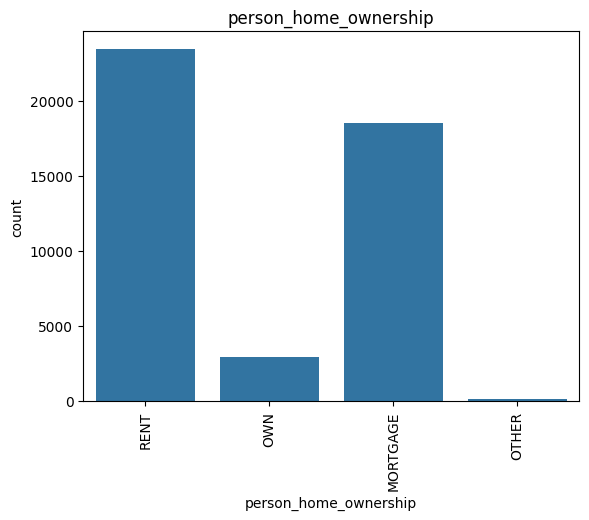

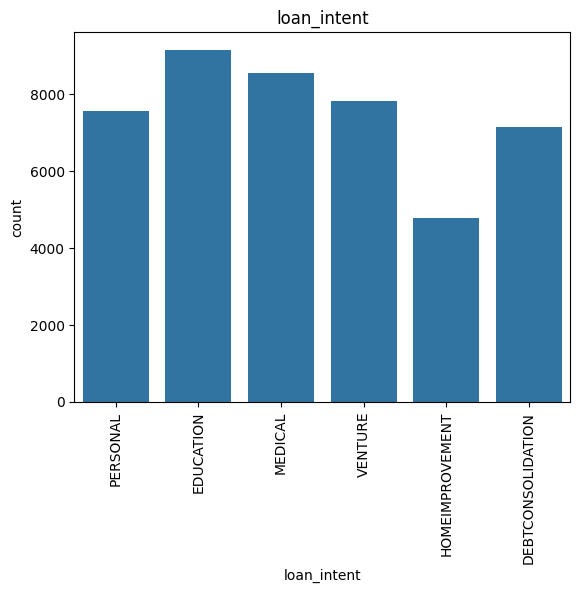

In [137]:
for col in Univar_columns:
    plt.figure()
    sns.countplot(x=col,data=df_raw)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()


#sns.countplot(x='person_gender',data=df_raw)




Checking Outlier

144.0

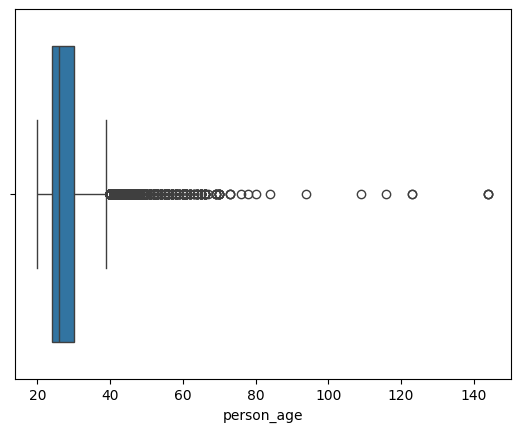

In [138]:
sns.boxplot(x='person_age',data=df_raw)
max(df_raw['person_age'])

In [ ]:
#For Raw data

In [ ]:
# q1 = df_raw['person_age'].quantile(0.25)
# q3 = df_raw['person_age'].quantile(0.75)
# iqr = q3-q1

# lower_tail = q1 - 1.5 *iqr
# upper_tail = q3 + 1.5 * iqr

# med = np.median(df_raw['person_age'])

# for i in df_raw['person_age']:
#     if i < lower_tail or i > upper_tail:
#         df_raw['person_age'] = df_raw['person_age'].replace(i,med)


<Axes: xlabel='person_age'>

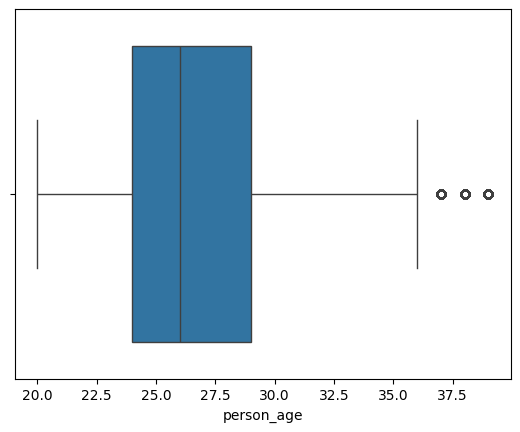

In [ ]:
# sns.boxplot(x='person_age',data=df_raw)

In [ ]:
# q1 = df['person_age'].quantile(0.25)
# q3 = df['person_age'].quantile(0.75)
# iqr = q3-q1

# lower_tail = q1 - 1.5 *iqr
# upper_tail = q3 + 1.5 * iqr

# med = np.median(df_raw['person_age'])

# for i in df_raw['person_age']:
#     if i < lower_tail or i > upper_tail:
#         df_raw['person_age'] = df_raw['person_age'].replace(i,med)


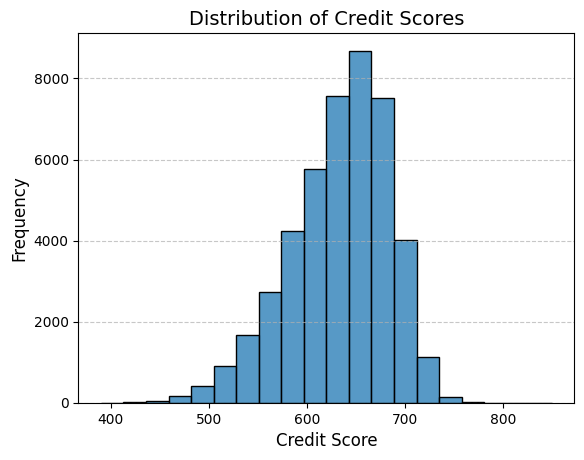

In [139]:
sns.histplot(data=df_raw,x='credit_score',bins=20)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Credit Scores", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

BIVARIENT

In [140]:
df_raw.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


<Axes: xlabel='person_home_ownership', ylabel='loan_amnt'>

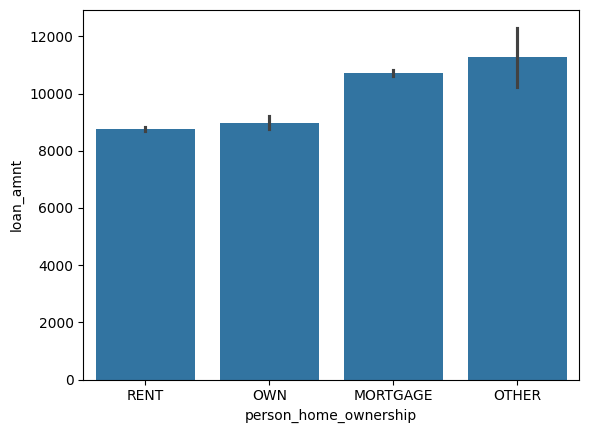

In [141]:
sns.barplot(x='person_home_ownership',y='loan_amnt',data=df_raw)

<Axes: xlabel='person_education', ylabel='person_age'>

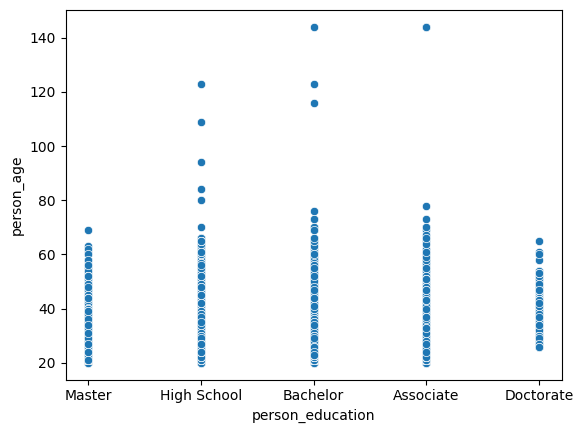

In [142]:
sns.scatterplot(x='person_education',y='person_age',data=df_raw)

In [143]:
df_raw.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


<Axes: xlabel='person_gender', ylabel='person_age'>

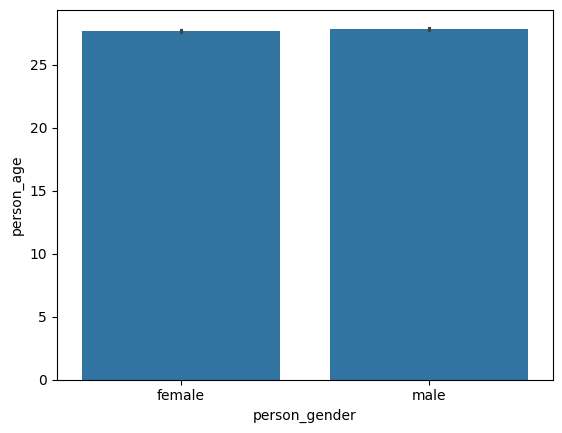

In [147]:
sns.barplot(x='person_gender',y='person_age',data=df_raw)

<Axes: xlabel='loan_status', ylabel='credit_score'>

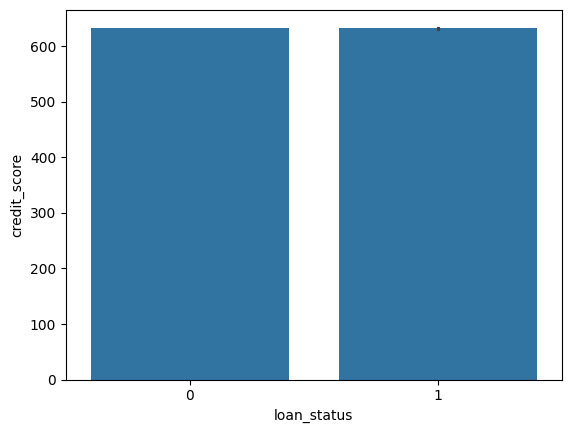

In [154]:
sns.barplot(x='loan_status',y='credit_score',data=df_raw)

In [ ]:
#Heat Map

In [156]:
df_raw.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [158]:
Numerical_columns = ['person_age','person_emp_exp','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']

<Axes: >

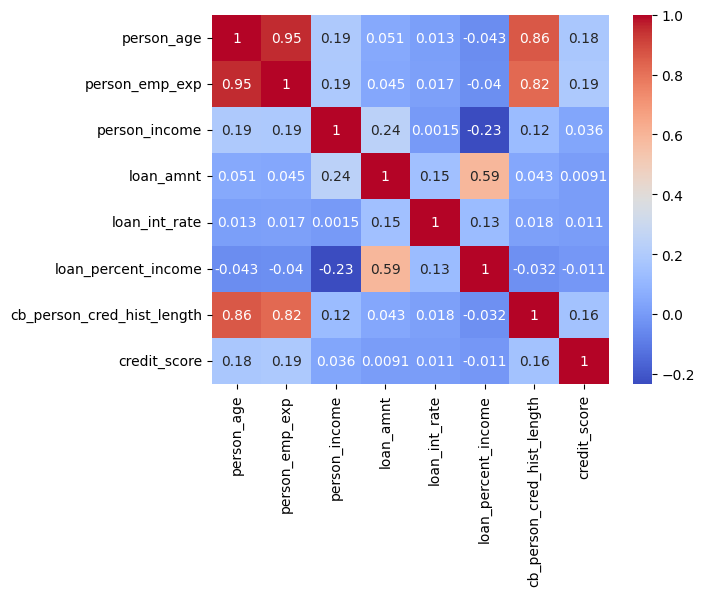

In [159]:
corr = df_raw[Numerical_columns].corr()

sns.heatmap(corr,annot=True,cmap='coolwarm')

Model Building

In [161]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('loan_status',axis=1)
y=df['loan_status']

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [163]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
24224,0.535285,1,-0.502953,-0.773126,0.097249,0.904822,-0.852465,-1.461512,1.061978,1.035130,0.549665,-0.844820,-1.016040
38081,-0.457264,1,0.849192,-0.466480,-0.067673,-1.177817,0.857799,0.274312,1.038479,2.411098,-0.739109,-1.043094,0.984213
2955,-0.291839,1,-1.179025,-0.467400,-0.397517,-1.177817,-0.915808,-0.304296,-1.499477,-0.570165,-0.739109,-1.538778,0.984213
30973,2.520384,1,0.173120,0.086742,1.911393,-1.177817,-0.717861,-1.461512,-1.348409,-0.914157,2.611702,1.455156,0.984213
41258,1.031560,0,1.525264,-0.390095,0.921860,0.904822,-0.567421,-1.461512,0.289849,-0.226173,1.065174,1.574120,-1.016040


In [166]:
X_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
37979,0.700710,1,-1.179025,0.205740,0.756938,-1.177817,-0.329884,-0.882904,-1.667332,-0.684829,1.065174,-0.626719,-1.016040
9911,-0.622689,1,-1.179025,-0.291974,0.097249,0.904822,-0.092348,-0.882904,0.162280,0.232483,-0.481354,0.285341,0.984213
43386,-0.953538,0,1.525264,-0.534944,-0.892284,0.904822,-0.725778,0.274312,1.300331,-0.111509,-0.481354,1.554293,-1.016040
13822,-0.788113,0,-0.502953,-0.502042,-0.727362,0.210609,-0.725778,1.431527,1.001551,-0.111509,-0.739109,-0.706028,0.984213
44810,2.354959,1,0.849192,-0.153504,2.406160,-1.177817,0.066010,-0.304296,1.478257,0.117819,1.322928,-0.924130,-1.016040


Model Building

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [176]:
y_pred = Knn.predict(X_test)

In [178]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of KNN Classifier:", accuracy)

Accuracy of KNN Classifier: 0.8823111111111112


In [182]:
from sklearn.metrics import classification_report, confusion_matrix

In [184]:
Class_report = classification_report(y_test,y_pred)
print("Classification Report:\n", Class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      8730
           1       0.75      0.71      0.73      2520

    accuracy                           0.88     11250
   macro avg       0.83      0.82      0.83     11250
weighted avg       0.88      0.88      0.88     11250



In [185]:
matrix =  confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[8126  604]
 [ 720 1800]]


In [208]:
params = {'n_neighbors' : [3,5,7,9,11]}

In [209]:
from sklearn.model_selection import GridSearchCV

In [210]:
grid_func = GridSearchCV(KNeighborsClassifier(),params)

In [211]:
grid_func.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,11


In [213]:
k=grid_func.best_params_

In [222]:
j=k.values()


In [225]:
N=list(j)[0]
N

11

In [226]:
Knn_N = KNeighborsClassifier(n_neighbors=N)

In [227]:
Knn_N.fit(X_train,y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [228]:
y_grid_pred = Knn_N.predict(X_test)

In [ ]:
accuracy = accuracy_score(X_test,y_grid_pred)

In [231]:
class_2 = classification_report(y_test,y_grid_pred)

In [232]:
matrix_2 = confusion_matrix(y_test,y_grid_pred)

In [234]:
print(accuracy)
print(class_2)
print(matrix_2)

1.0
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8730
           1       0.80      0.71      0.75      2520

    accuracy                           0.90     11250
   macro avg       0.86      0.83      0.84     11250
weighted avg       0.89      0.90      0.89     11250

[[8271  459]
 [ 722 1798]]
